In [44]:
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

In [101]:
def draw_map(lats, lons, mags, timestrings, labels):
    ax = plt.figure(figsize = (20,20))

    #Set map
    eq_map = Basemap(projection = 'robin', resolution = "l", area_thresh = 1000, lat_0 = 0,lon_0 = -130)

    #Standard map boundaries
    eq_map.drawcoastlines()
    eq_map.drawcountries()
    eq_map.fillcontinents(color = "grey")
    eq_map.drawmapboundary()

    #Draw meridians
    eq_map.drawmeridians(np.arange(0, 360, 30))
    eq_map.drawparallels(np.arange(-90, 90, 30))


    #Set size of the dot equal to magnitude
    min_marker_size = 4
    for lon, lat, mag, label in zip(lons, lats, mags, labels):
        x, y = eq_map(lon, lat)
        msize = mag*min_marker_size

        eq_map.plot(x, y, "o", markersize = msize, alpha = 0.5, markeredgecolor = "k", markeredgewidth = 2, \
                    color = ["red" if mag > 6 else "green"][0])
        
    for label, lon, lat, mag in zip(labels, lons, lats, mags):
        if mag > 7:
            x, y = eq_map(lon, lat)
            plt.text(x, y, label, fontweight = "bold", fontsize = 10) 

    title_string = "Earthquakes of Magnitude 1.0 or Greater \n"
    title_string += "%s through %s" % (timestrings[0][:10], timestrings[-1][:10])
    plt.title(title_string,fontsize = 30, fontweight = "bold")
    

    plt.show()

In [3]:
import pandas as pd
link = 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/significant_month.csv'
data = pd.read_csv(link)
lats = data["latitude"].tolist()
lons = data["longitude"].tolist()
mags = data["mag"].tolist()
timestrings = data["time"].tolist()
labels = []
for i in range(data.shape[0]):
    labels.append(data["time"][i][:10] + "\n"+"Mag: " + str(data["mag"][i]))

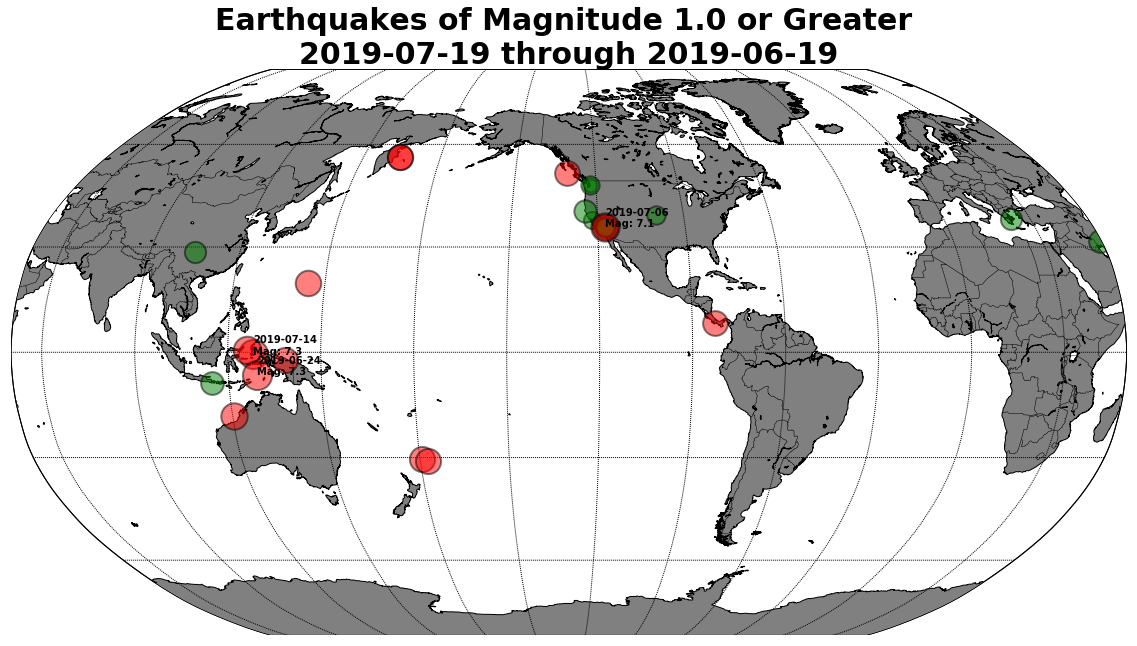

In [102]:
draw_map(lats, lons, mags, timestrings, labels)

In [98]:
print("Top 10 earthquakes in the last month \n")
for i in range(10):
    row = data.sort_values(by = "mag", ascending = False).iloc[i]
    print(row["place"] + " - " + str(row["mag"]) + " - " + str(row["time"][:10]))


Top 10 earthquakes in the last month 

102km NNE of Laiwui, Indonesia - 7.3 - 2019-07-14
292km NW of Saumlaki, Indonesia - 7.3 - 2019-06-24
2019 Ridgecrest Earthquake Sequence - 7.1 - 2019-07-06
133km WSW of Kota Ternate, Indonesia - 6.9 - 2019-07-07
202km W of Broome, Australia - 6.6 - 2019-07-14
2019 Ridgecrest Earthquake Sequence - 6.4 - 2019-07-04
88km SW of Farallon de Pajaros, Northern Mariana Islands - 6.4 - 2019-06-28
150km ENE of L'Esperance Rock, New Zealand - 6.3 - 2019-06-21
105km E of Ust'-Kamchatsk Staryy, Russia - 6.3 - 2019-06-25
101km E of Ust'-Kamchatsk Staryy, Russia - 6.3 - 2019-06-26
